# Classification and regression task

1. Predict house price <i>regression
2. Predict whether a client returns a loan - <i>classification
3. Predict when a patient needs to take medicine - <i>classification
4. Choose what medicine out of available a patient should take - <i>classification
5. Choose segment of clients for a promo communication - <i>classification and regression
6. Recognition of defective products on the production line (based on photo scans) - <i>classification
7. Decide how to place products on a shelf in a store - <i>classification and regression
8. Search sites for input text query - <i>regression
9. Split customers of a store into segments to understand differences of their behavior - <i>classification and regression
10. Detect anomaly in site traffic - <i>classification

# Clustering Tasks
1. Customer Segmentation: Grouping customers based on purchasing behavior or demographics helps businesses tailor marketing strategies effectively
2. Document Clustering: This involves automatically grouping news articles or documents into topics or categories, making information retrieval easier
# Association Tasks
1. Market Basket Analysis: This classic application identifies product associations in retail (e.g., customers who buy bread often also buy butter) to optimize product placement and promotions
2. Web Recommendation Systems: Analyzing user behavior to recommend related content increases user engagement by presenting items they are likely to enjoy based on past interactions
# Dimensionality Reduction Tasks
1. Image Compression: Reducing the number of features in images allows for smaller file sizes while retaining essential visual information, which enhances storage efficiency
2. Speeding up Machine Learning Models: By reducing the feature space, models can train faster and exhibit better performance, particularly in high-dimensional datasets

# Introduction

## 5 ML examples:

#### 1. Email Spam Detection
Classification Type: Binary Classification
Benefit: Machine learning algorithms filter out unwanted emails, improving productivity by ensuring users focus only on relevant communications. This reduces the chances of missing important messages hidden among spam

#### 2. Image Recognition for Medical Diagnosis
Classification Type: Multiclass Classification
Benefit: ML algorithms analyze medical images to identify diseases such as cancer or heart disease. This enhances diagnostic accuracy and speeds up treatment, leading to better patient outcomes

#### 3. Sentiment Analysis in Social Media
Classification Type: Multilabel Classification
Benefit: By categorizing posts as positive, negative, or neutral, organizations can gauge public sentiment towards their brand in real-time. This information is invaluable for marketing strategies and customer engagement

#### 4. Fraud Detection in Financial Transactions
Classification Type: Binary Classification (or Multiclass depending on the system used)
Benefit: Machine learning models identify suspicious patterns in payment activities, minimizing financial losses and protecting users from fraud

#### 5. Recommendation Systems in E-commerce
Classification Type: Multilabel Classification
Benefit: By suggesting products based on user preferences and past behaviors, ML enhances the shopping experience. This personalization increases sales and customer satisfaction.

## Differences Between Multiclass and Multilabel Classification
Multiclass Classification: Each instance is assigned to one of three or more classes, such as classifying types of fruits (apple, orange, banana). Each input has a single label, and classes are mutually exclusive
Multilabel Classification: Instances can belong to multiple classes simultaneously, like tagging a news article with several relevant topics (e.g., politics and environment)

## Classification or Regression
It is possible to transform a regression problem into a classification problem by defining price ranges or categories (e.g., low, medium, high). For instance, instead of predicting a specific price, a model could classify houses into categories based on their prices, effectively reducing the problem from regression to multiclass classification. This can assist in decision-making where only categorical outcomes are required, but it may sacrifice the precision of exact price predictions

# Imports




In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Introduction to Data Analysis



In [2]:
raw_data = pd.read_json('data/train.json')
raw_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [3]:
print(f"Num of rows: {raw_data.shape[0]}")
print(f"Num of columns: {raw_data.shape[1]}")

Num of rows: 49352
Num of columns: 15


In [4]:
raw_data.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

target - price




In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


There are 3 types of data: float64, int64, object. There are no empty columns




In [6]:
raw_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


Max num of baths: 10, bedrooms: 8. Хорошо живут молодые. The max squere of apartament is 44*7. А как ширина в минус ушла вообще




In [7]:
raw_data[['bathrooms', 'bedrooms', 'latitude', 'listing_id', 'longitude', 'price']].corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


The correlation is quite normal




In [8]:
data = raw_data[['bathrooms', 'bedrooms', 'interest_level', 'price']]
data

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


In [9]:
min(data['price'])

43

# Statistical Data Analysis




## Target analysis




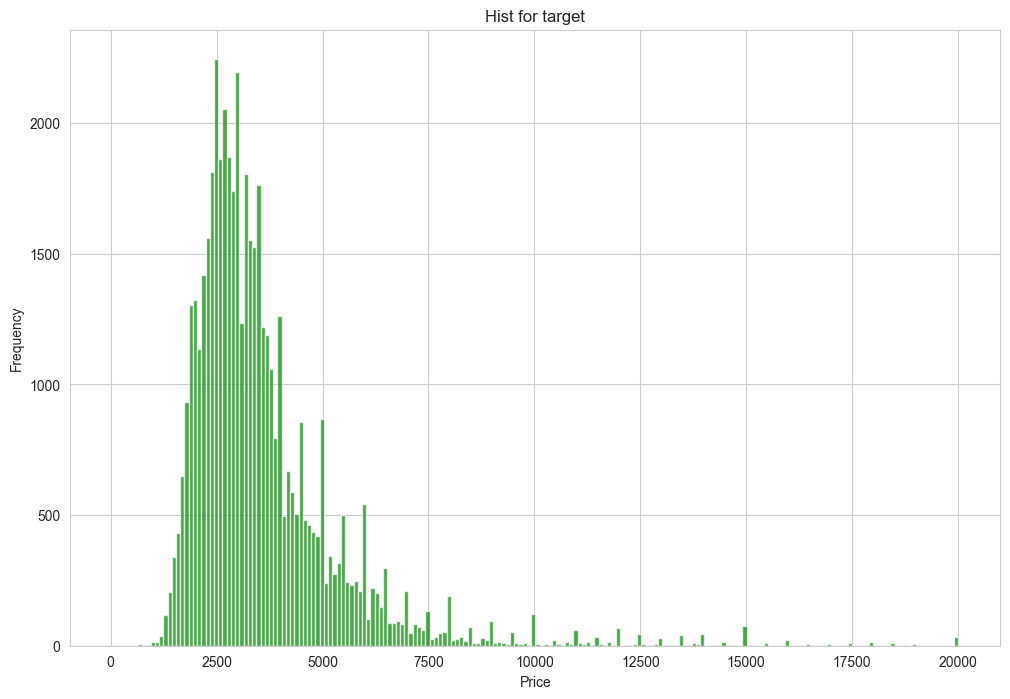

In [10]:
plt.figure(figsize=(12, 8))
plt.hist(data['price'], bins=200, range=(43, 20000), color='green', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Hist for target')
plt.show()

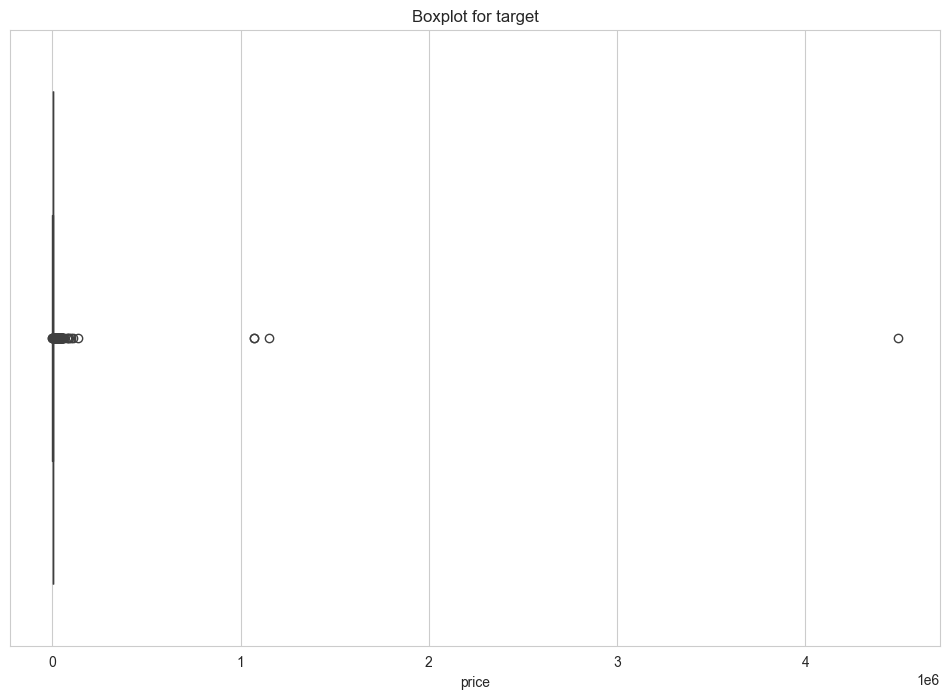

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data['price'], orient='h')
plt.title('Boxplot for target')
plt.show()

Выбросы присутсвуют




In [12]:
lower_bound = data['price'].quantile(0.01)
upper_bound = data['price'].quantile(0.99)
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
data

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


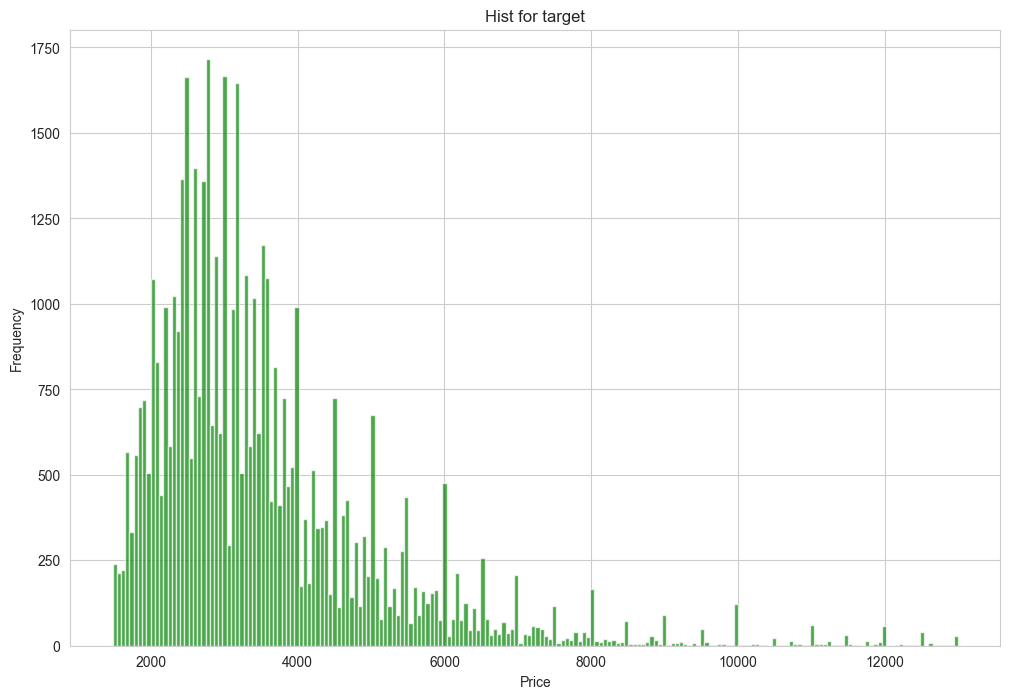

In [13]:
plt.figure(figsize=(12, 8))
plt.hist(data['price'], bins=200, color='green', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Hist for target')
plt.show()

## Characteristics Analysis




In [14]:
print(f"Counts of each value in 'interest_level': {data['interest_level'].value_counts()}")

Counts of each value in 'interest_level': interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64


In [15]:
one_hot_encoded = pd.get_dummies(data['interest_level'], prefix='interest_level')
data = pd.concat([data, one_hot_encoded], axis=1)
data = data.drop('interest_level', axis=1)
data

,bathrooms,bedrooms,price,interest_level_high,interest_level_low,interest_level_medium
4,1.0,1,2400,False,False,True
6,1.0,2,3800,False,True,False
9,1.0,2,3495,False,False,True
10,1.5,3,3000,False,False,True
15,1.0,0,2795,False,True,False
...,...,...,...,...,...,...
124000,1.0,3,2800,False,True,False
124002,1.0,2,2395,False,False,True
124004,1.0,1,1850,False,False,True
124008,1.0,2,4195,False,False,True


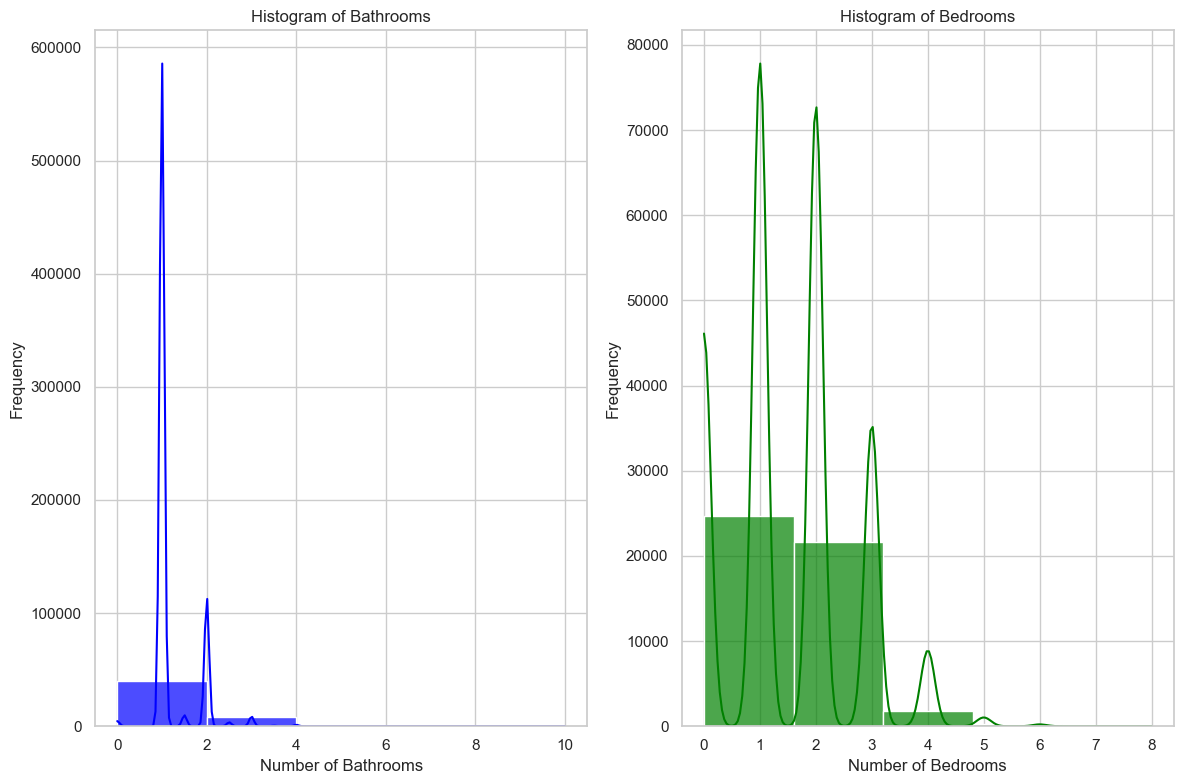

In [16]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.histplot(data['bathrooms'], bins=5, kde=True, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Histogram of Bathrooms')
axes[0].set_xlabel('Number of Bathrooms')
axes[0].set_ylabel('Frequency')

sns.histplot(data['bedrooms'], bins=5, kde=True, ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Histogram of Bedrooms')
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Complex analysis




In [17]:
correlation_matrix = data.corr()

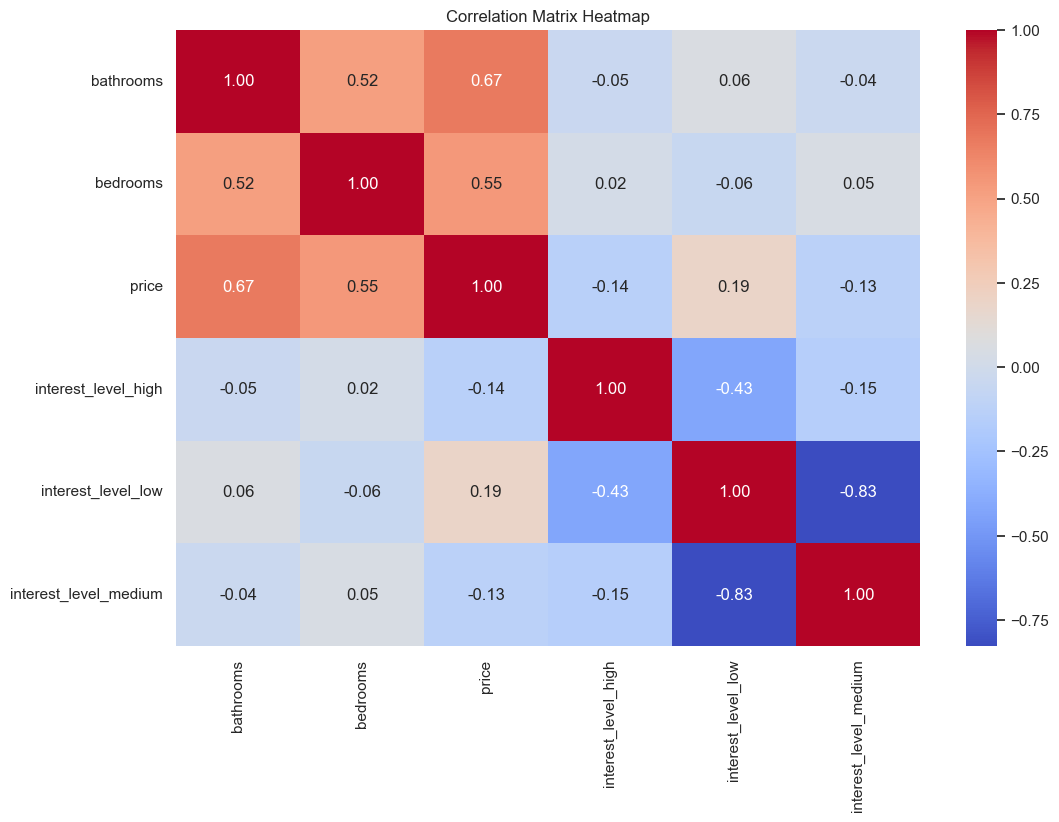

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Корреляция в целом неплохая, хотя высокая корреляция между ванной и спальней смущает. Буду ли я что-то делать с этим? Нет




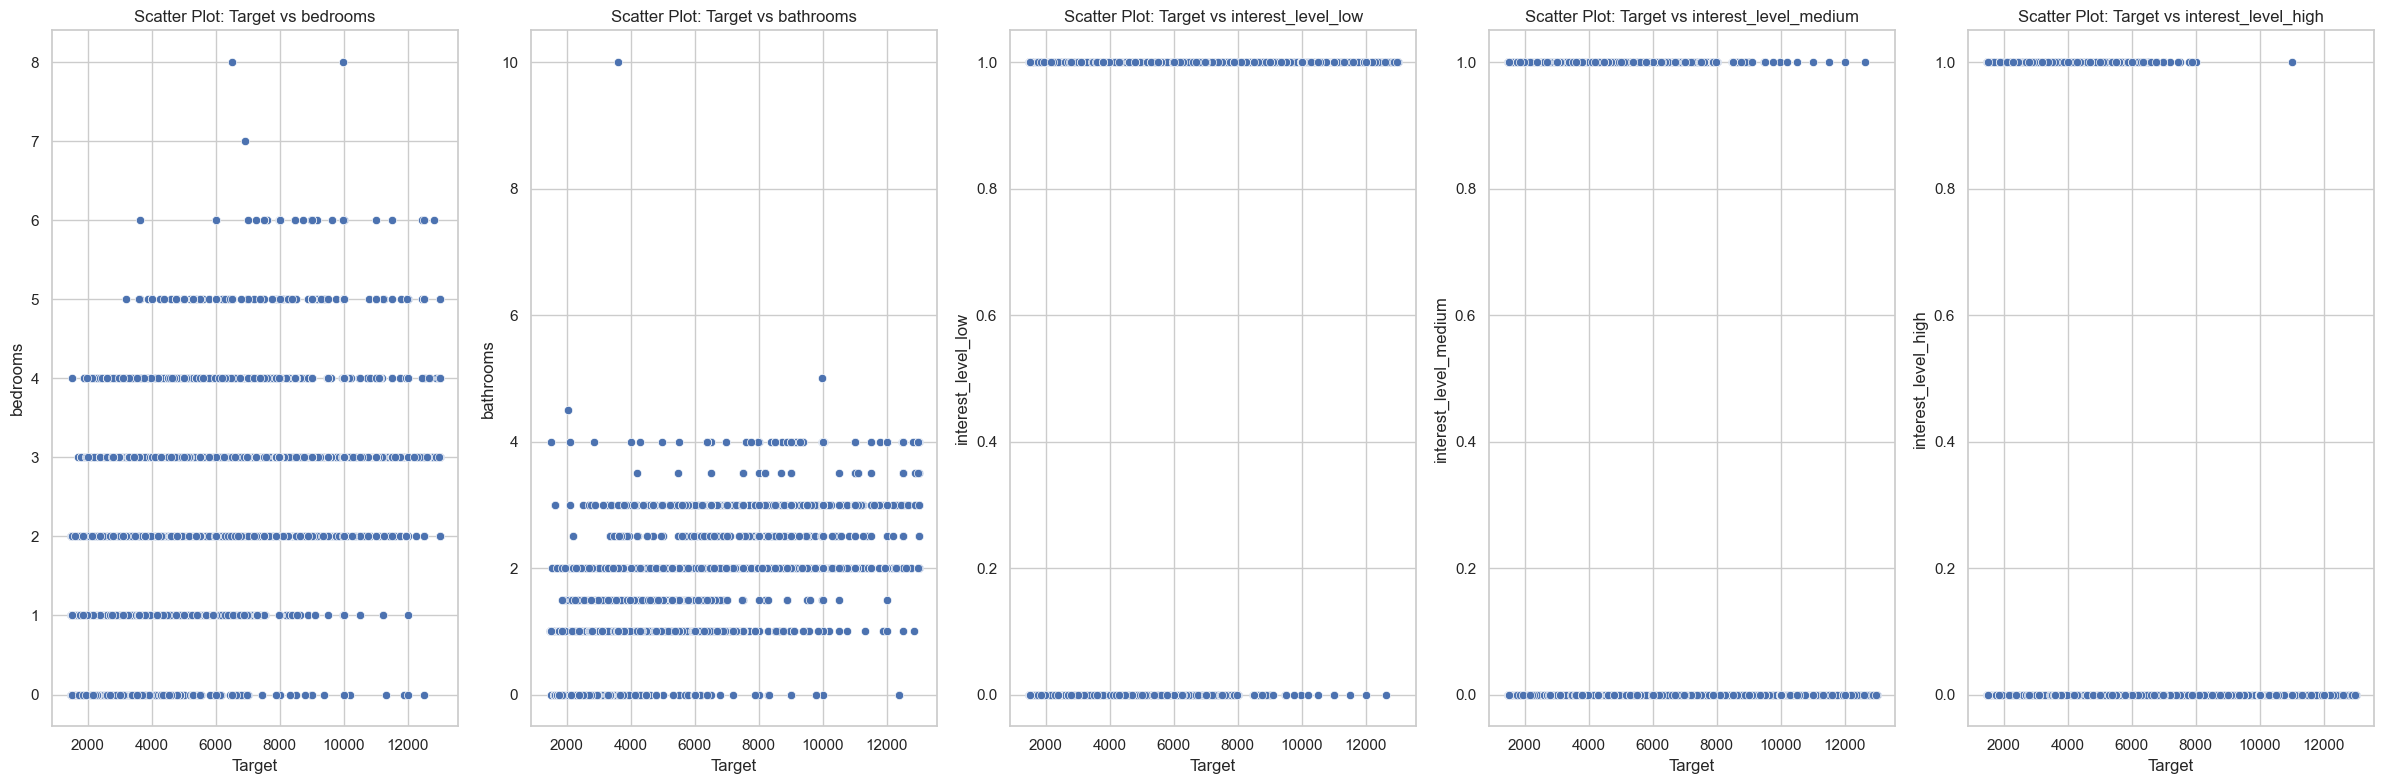

In [19]:
features = ['bedrooms', 'bathrooms', 'interest_level_low', 'interest_level_medium', 'interest_level_high']
plt.figure(figsize=(24, 8))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    sns.scatterplot(x=data['price'], y=data[feature])
    plt.title(f'Scatter Plot: Target vs {feature}')
    plt.xlabel('Target')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Creating Features




In [20]:
data['bathrooms_squared'] = data['bathrooms'] ** 2
data['bedrooms_squared'] = data['bedrooms'] ** 2

In [21]:
correlation_matrix = data[['bathrooms_squared', 'bedrooms_squared', 'price', 'interest_level_low', 'interest_level_medium', 'interest_level_high']].corr()

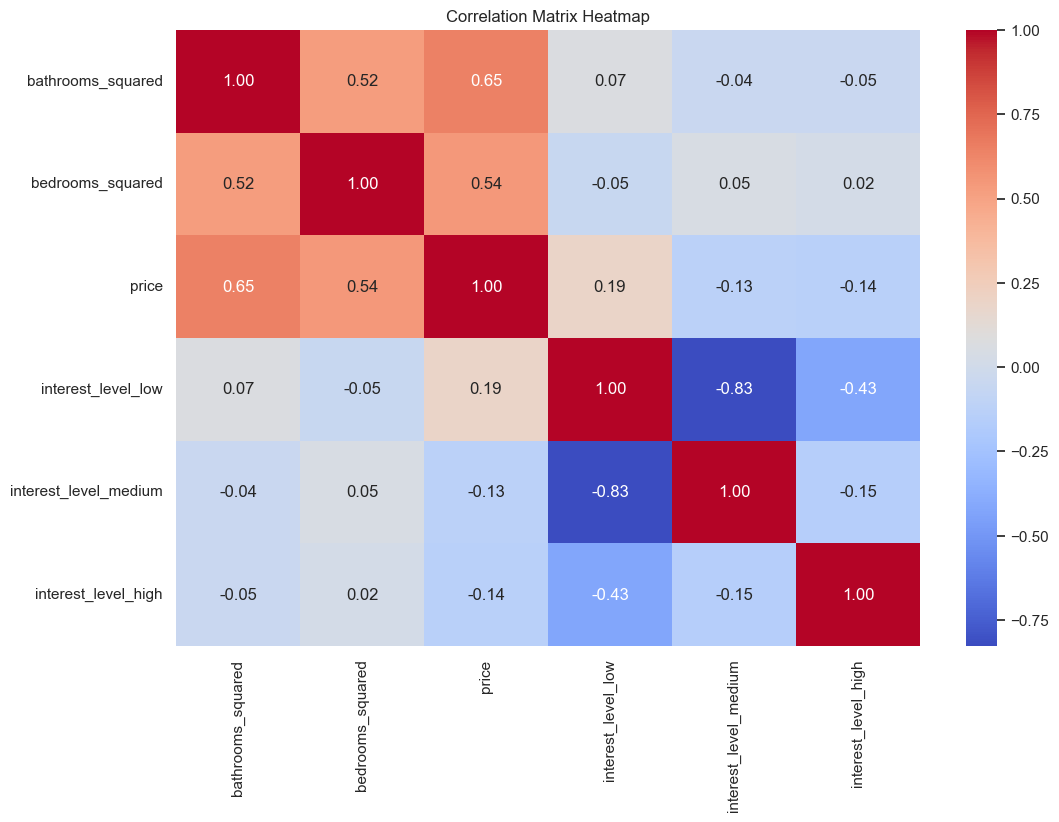

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
data_trains = data[['bathrooms', 'bedrooms', 'price']]
data_train = data_trains.copy()
data_train

,bathrooms,bedrooms,price
4,1.0,1,2400
6,1.0,2,3800
9,1.0,2,3495
10,1.5,3,3000
15,1.0,0,2795
...,...,...,...
124000,1.0,3,2800
124002,1.0,2,2395
124004,1.0,1,1850
124008,1.0,2,4195


In [24]:
data_tests = pd.read_json('data/test.json')
data_tests = data_tests[['bathrooms', 'bedrooms', 'price']]
data_test = data_tests.copy()
data_test

,bathrooms,bedrooms,price
0,1.0,1,2950
1,1.0,2,2850
2,1.0,0,2295
3,1.0,2,2900
5,1.0,1,3254
...,...,...,...
124003,1.0,1,1700
124005,1.0,2,4195
124006,1.0,0,2400
124007,2.0,2,6895


In [25]:
X_train = data_train.drop('price', axis=1)
y_train = data_train['price']
X_test = data_test.drop('price', axis=1)
y_test = data_test['price']

In [26]:
poly = PolynomialFeatures(degree=10)

In [27]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Training models




## Results table




In [28]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

## Linear regression

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

data_train.loc[X_train.index, 'predictions_train'] = model.predict(X_train)
data_test.loc[X_test.index, 'predictions_test'] = model.predict(X_test)

In [30]:
mae_train = mean_absolute_error(y_train, data_train.loc[X_train.index, 'predictions_train'])
mae_test = mean_absolute_error(y_test, data_test.loc[X_test.index, 'predictions_test'])

In [31]:
rmse_train = np.sqrt(mean_squared_error(y_train, data_train.loc[X_train.index, 'predictions_train']))
rmse_test = np.sqrt(mean_squared_error(y_test, data_test.loc[X_test.index, 'predictions_test']))

In [32]:
new_row_mae = pd.DataFrame({'model': ['linear_regression'], 'train': [mae_train], 'test': [mae_test]})
if not new_row_mae.empty and new_row_mae.notna().any().any():
    result_MAE = pd.concat([result_MAE, new_row_mae], ignore_index=True)

/var/folders/7w/w8_mhh892pl6nnkczqktr7v40000gn/T/ipykernel_83792/1375220238.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([result_MAE, new_row_mae], ignore_index=True)


In [33]:
new_row_rmse = pd.DataFrame({'model': ['linear_regression'], 'train': [rmse_train], 'test': [rmse_test]})
if not new_row_rmse.empty and new_row_rmse.notna().any().any():
    result_RMSE = pd.concat([result_RMSE, new_row_rmse], ignore_index=True)

/var/folders/7w/w8_mhh892pl6nnkczqktr7v40000gn/T/ipykernel_83792/3946228622.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([result_RMSE, new_row_rmse], ignore_index=True)


In [34]:
data_train.drop('predictions_train', axis=1, inplace=True)
data_test.drop('predictions_test', axis=1, inplace=True)

## Decision Tree




In [35]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

data_train.loc[X_train.index, 'predictions_train'] = model.predict(X_train)
data_test.loc[X_test.index, 'predictions_test'] = model.predict(X_test)

In [36]:
mae_train = mean_absolute_error(y_train, data_train.loc[X_train.index, 'predictions_train'])
mae_test = mean_absolute_error(y_test, data_test.loc[X_test.index, 'predictions_test'])

In [37]:
rmse_train = np.sqrt(mean_squared_error(y_train, data_train.loc[X_train.index, 'predictions_train']))
rmse_test = np.sqrt(mean_squared_error(y_test, data_test.loc[X_test.index, 'predictions_test']))

In [38]:
new_row_mae = pd.DataFrame({'model': ['decision_tree'], 'train': [mae_train], 'test': [mae_test]})
if not new_row_mae.empty and new_row_mae.notna().any().any():
    result_MAE = pd.concat([result_MAE, new_row_mae], ignore_index=True)

In [39]:
new_row_rmse = pd.DataFrame({'model': ['decision_tree'], 'train': [rmse_train], 'test': [rmse_test]})
if not new_row_rmse.empty and new_row_rmse.notna().any().any():
    result_RMSE = pd.concat([result_RMSE, new_row_rmse], ignore_index=True)

In [40]:
data_train.drop('predictions_train', axis=1, inplace=True)
data_test.drop('predictions_test', axis=1, inplace=True)

## Native Models

In [41]:
mean_price_train = data_train['price'].mean()
median_price_train = data_train['price'].median()

mean_price_test = data_test['price'].mean()
median_price_test = data_test['price'].median()

In [42]:
data_train['mean_price'] = mean_price_train
data_train['median_price'] = median_price_train

data_test['mean_price'] = mean_price_test
data_test['median_price'] = median_price_test

In [43]:
mae_mean_train = mean_absolute_error(data_train['price'], data_train['mean_price'])
mae_mean_test = mean_absolute_error(data_test['price'], data_test['mean_price'])

mae_median_train = mean_absolute_error(data_train['price'], data_train['median_price'])
mae_median_test = mean_absolute_error(data_test['price'], data_test['median_price'])

In [44]:
rmse_mean_train = np.sqrt(mean_squared_error(data_train['price'], data_train['mean_price']))
rmse_mean_test = np.sqrt(mean_squared_error(data_test['price'], data_test['mean_price']))

rmse_median_train = np.sqrt(mean_squared_error(data_train['price'], data_train['median_price']))
rmse_median_test = np.sqrt(mean_squared_error(data_test['price'], data_test['median_price']))

In [45]:
mean_metrics = pd.DataFrame({
    'model': ['native_mean'],
    'train': [mae_mean_train],
    'test': [mae_mean_test]
})

median_metrics = pd.DataFrame({
    'model': ['native_median'],
    'train': [mae_median_train],
    'test': [mae_median_test]
})

result_MAE = pd.concat([result_MAE, mean_metrics, median_metrics], ignore_index=True)

In [46]:
mean_rmse_metrics = pd.DataFrame({
    'model': ['native_mean'],
    'train': [rmse_mean_train],
    'test': [rmse_mean_test]
})

median_rmse_metrics = pd.DataFrame({
    'model': ['native_median'],
    'train': [rmse_median_train],
    'test': [rmse_median_test]
})

result_RMSE = pd.concat([result_RMSE, mean_rmse_metrics, median_rmse_metrics], ignore_index=True)

## Compare the results



In [47]:
result_MAE

,model,train,test
0,linear_regression,784.563837,986.046717
1,decision_tree,756.044735,953.592155
2,native_mean,1139.192515,1440.961299
3,native_median,1086.210505,1322.640673


In [48]:
result_RMSE

,model,train,test
0,linear_regression,1123.877748,9625.054818
1,decision_tree,1077.483596,9589.260857
2,native_mean,1597.646655,9713.026562
3,native_median,1644.236439,9731.481148


the best model - decision tree


